# Visualization

This notebook contains some visualizations from the training runs on December 1 and 2. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
def plot_acc_loss(acc, loss, title=None, n_batches=None, conv=None):
    fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(10, 4.8), dpi=300)
    if title:
        fig.suptitle(title)
    if conv:
        acc = np.convolve(acc, np.ones(conv) / conv, mode='valid')
        loss = np.convolve(loss, np.ones(conv) / conv, mode='valid')
    axs[0].plot(acc)
    axs[0].set_ylabel('accuracy')
    axs[0].set_ylim(acc.min()*0.9, 1.)
    axs[1].plot(loss)
    axs[1].set_ylabel('loss')
    axs[1].set_ylim(loss.min()*0.9, loss.max()*1.1)
    axs[1].set_xlabel(f'batch ({n_batches} per epoch)')
    axs[1].set_yscale('log')
    axs[0].grid()
    axs[1].grid()
    if n_batches:
        axs[0].vlines(list(range(0, loss.shape[0], n_batches)), acc.min()*0.9, 1., ls='dashed', colors='green', lw=1)
        axs[1].vlines(list(range(0, loss.shape[0], n_batches)), loss.min()*0.9, loss.max()*1.1, ls='dashed', colors='green', lw=1)
    plt.tight_layout()
    plt.show()

In [4]:
def print_mean_acc_loss(acc, loss, n_batches):
    for i in range(acc.shape[0] // n_batches):
        a, b = i*n_batches, (i+1)*n_batches
        print(f'epoch {i+1}: acc {acc[a:b].mean():.2%} loss {loss[a:b].mean():.1f}')

# M1 model on reduced data

Trained this model on the M1 CPU with `batch_size=512` on `A1.npy` and `B1.npy` only, using ~20% of the testing data (randomly shuffled).

training:
epoch 1: acc 51.10% loss 118639.5
epoch 2: acc 60.19% loss 87279.0
epoch 3: acc 69.27% loss 82612.6
epoch 4: acc 78.82% loss 78873.4
epoch 5: acc 84.69% loss 75079.3
epoch 6: acc 88.15% loss 71120.7
epoch 7: acc 91.46% loss 69556.1

testing (last model):
acc 89.36% +/- 0.99% loss 59968.5 +/- 807.1


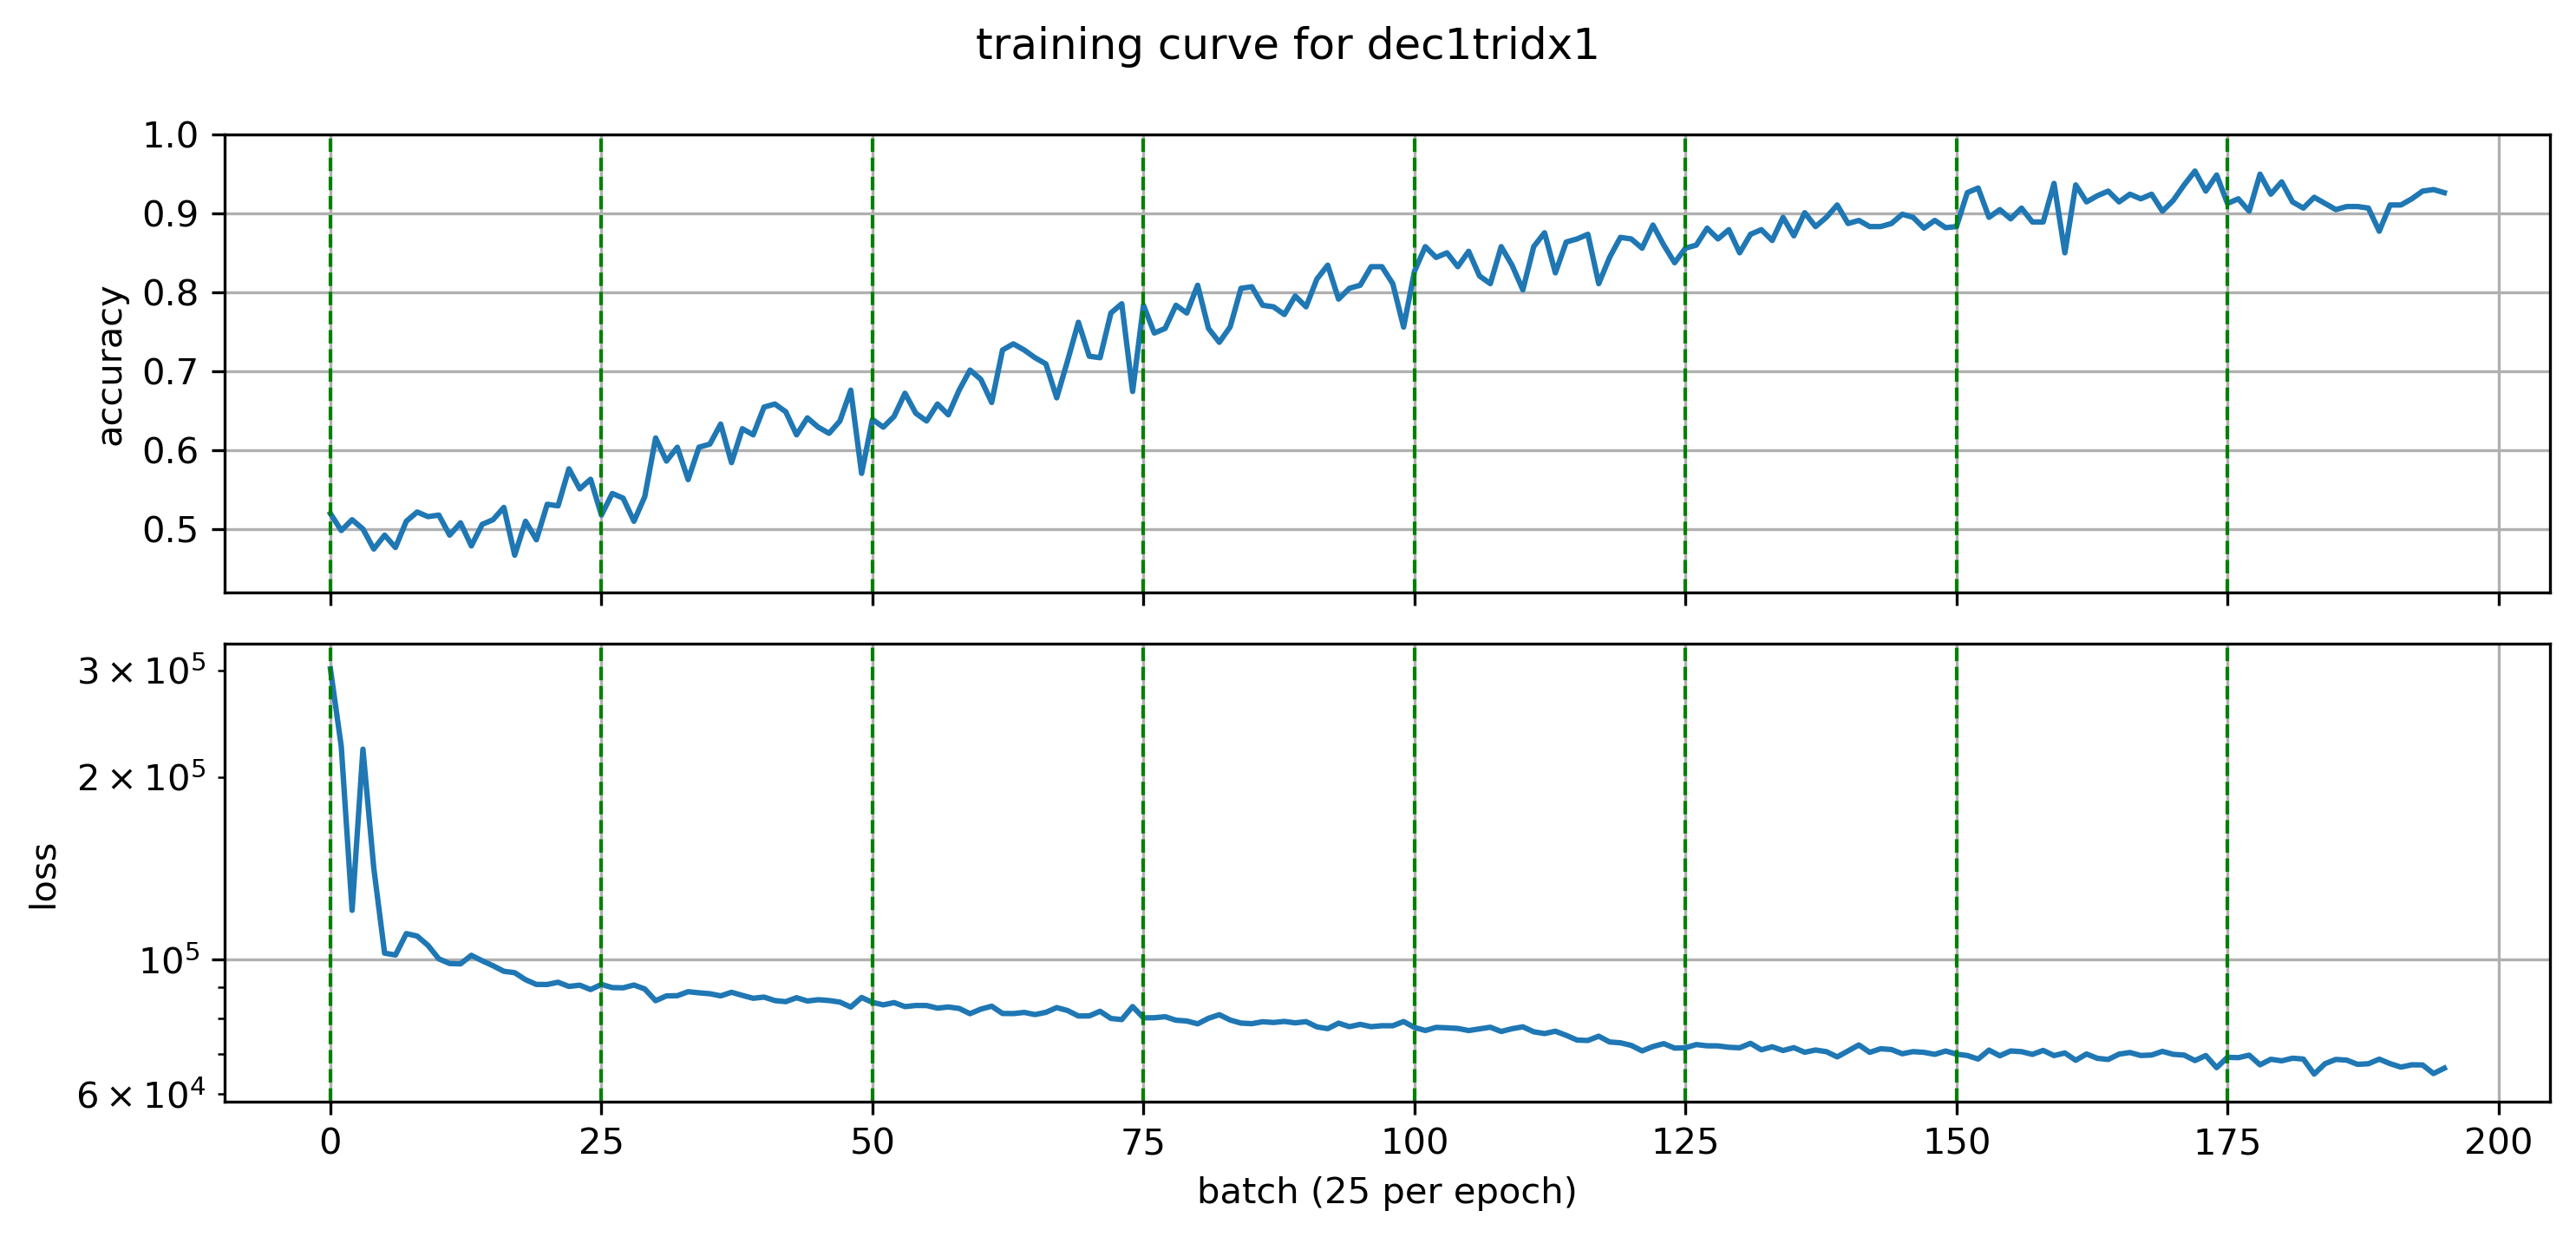

In [5]:
folder = '../models/dec1tridx1'
n_batches = 25
acc = np.load(f'{folder}/acc.npy')
loss = np.load(f'{folder}/loss.npy')
testacc = np.load(f'{folder}/test_acc.npy')
testloss = np.load(f'{folder}/test_loss.npy')

print('training:')
print_mean_acc_loss(acc, loss, n_batches)
print(f'\ntesting (last model):\nacc {testacc.mean():.2%} +/- {testacc.std():.2%} loss {testloss.mean():.1f} +/- {testloss.std():.1f}')
plot_acc_loss(acc, loss, title=f'training curve for {folder.split("/")[-1]}', n_batches=n_batches)

# GPU model on full data

Trained this model on a GPU with `batch_size=64` on all `A1-A3,B1-B3`. Testing on `A4,B4`, using ~20% of the testing data (randomly shuffled).

epoch 1: acc 84.64% loss 78843.8
epoch 2: acc 94.34% loss 49109.2
epoch 3: acc 95.42% loss 45831.2
epoch 4: acc 97.32% loss 40441.8
epoch 5: acc 97.77% loss 34818.8
epoch 6: acc 98.10% loss 33853.2
epoch 7: acc 98.14% loss 33483.1
epoch 8: acc 98.32% loss 33065.4
epoch 9: acc 98.20% loss 32747.7

testing (after six epochs):
acc 96.52% +/- 0.36% loss 35497.9 +/- 678.8


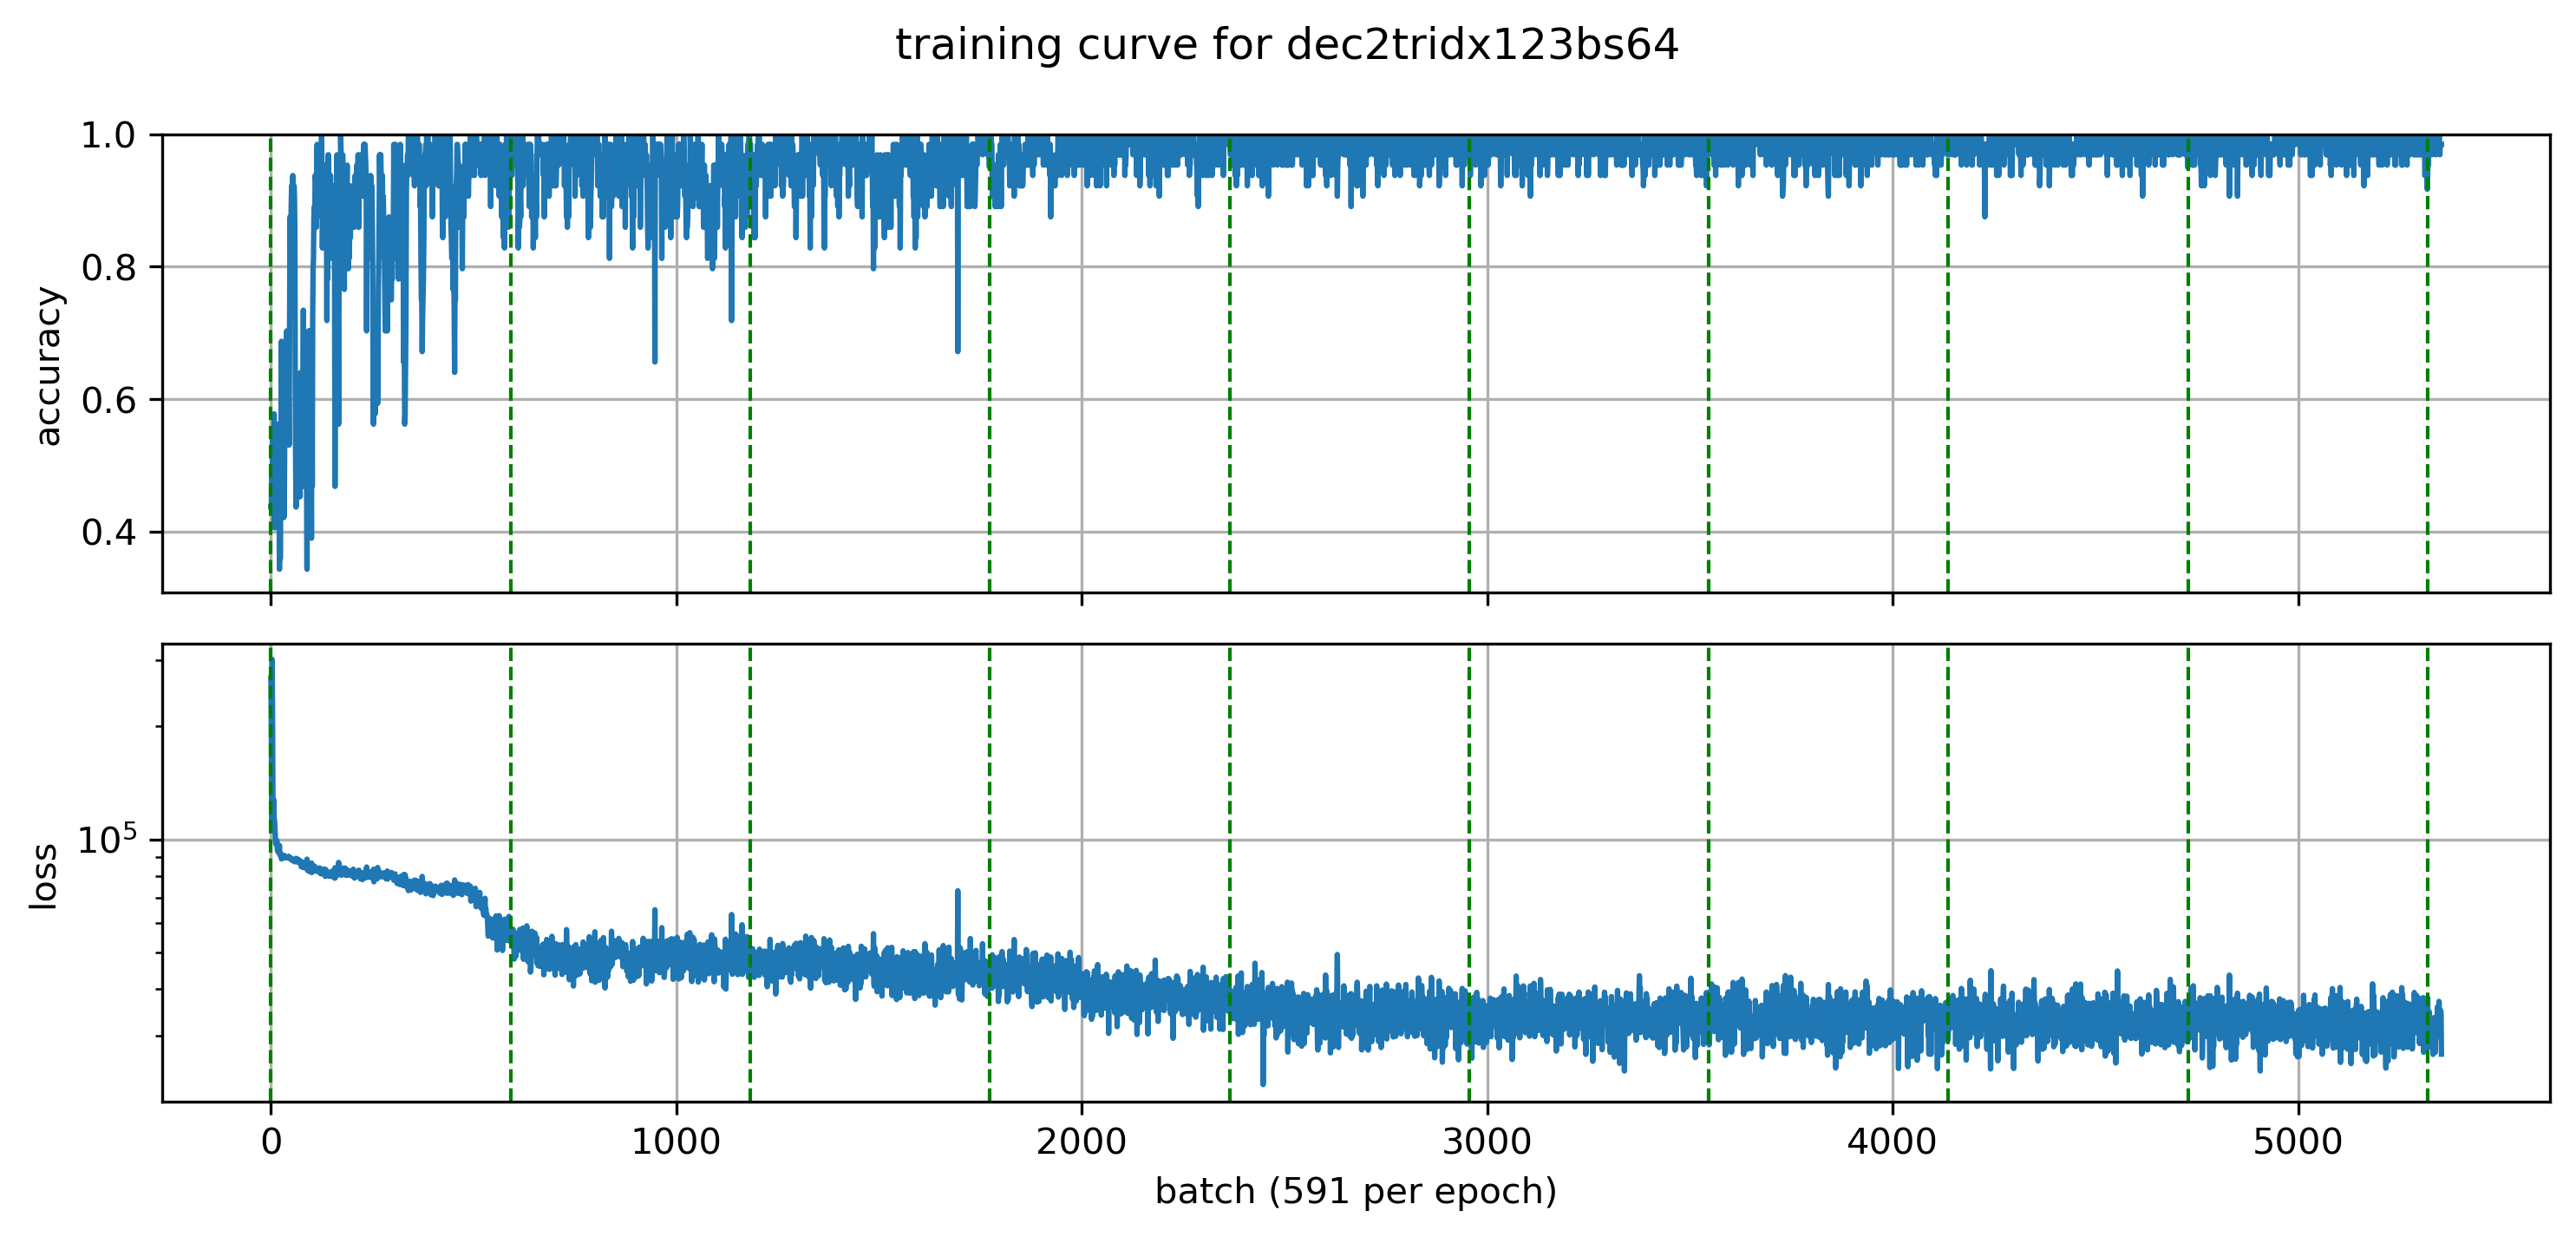

In [22]:
folder = '../models/dec2tridx123bs64'
n_batches = 591
acc = np.load(f'{folder}/acc.npy')
loss = np.load(f'{folder}/loss.npy')
testacc = np.load(f'{folder}/test_acc.npy')
testloss = np.load(f'{folder}/test_loss.npy')

print_mean_acc_loss(acc, loss, n_batches)
print(f'\ntesting (after six epochs):\nacc {testacc.mean():.2%} +/- {testacc.std():.2%} loss {testloss.mean():.1f} +/- {testloss.std():.1f}')
plot_acc_loss(acc, loss, title=f'training curve for {folder.split("/")[-1]}', n_batches=n_batches)

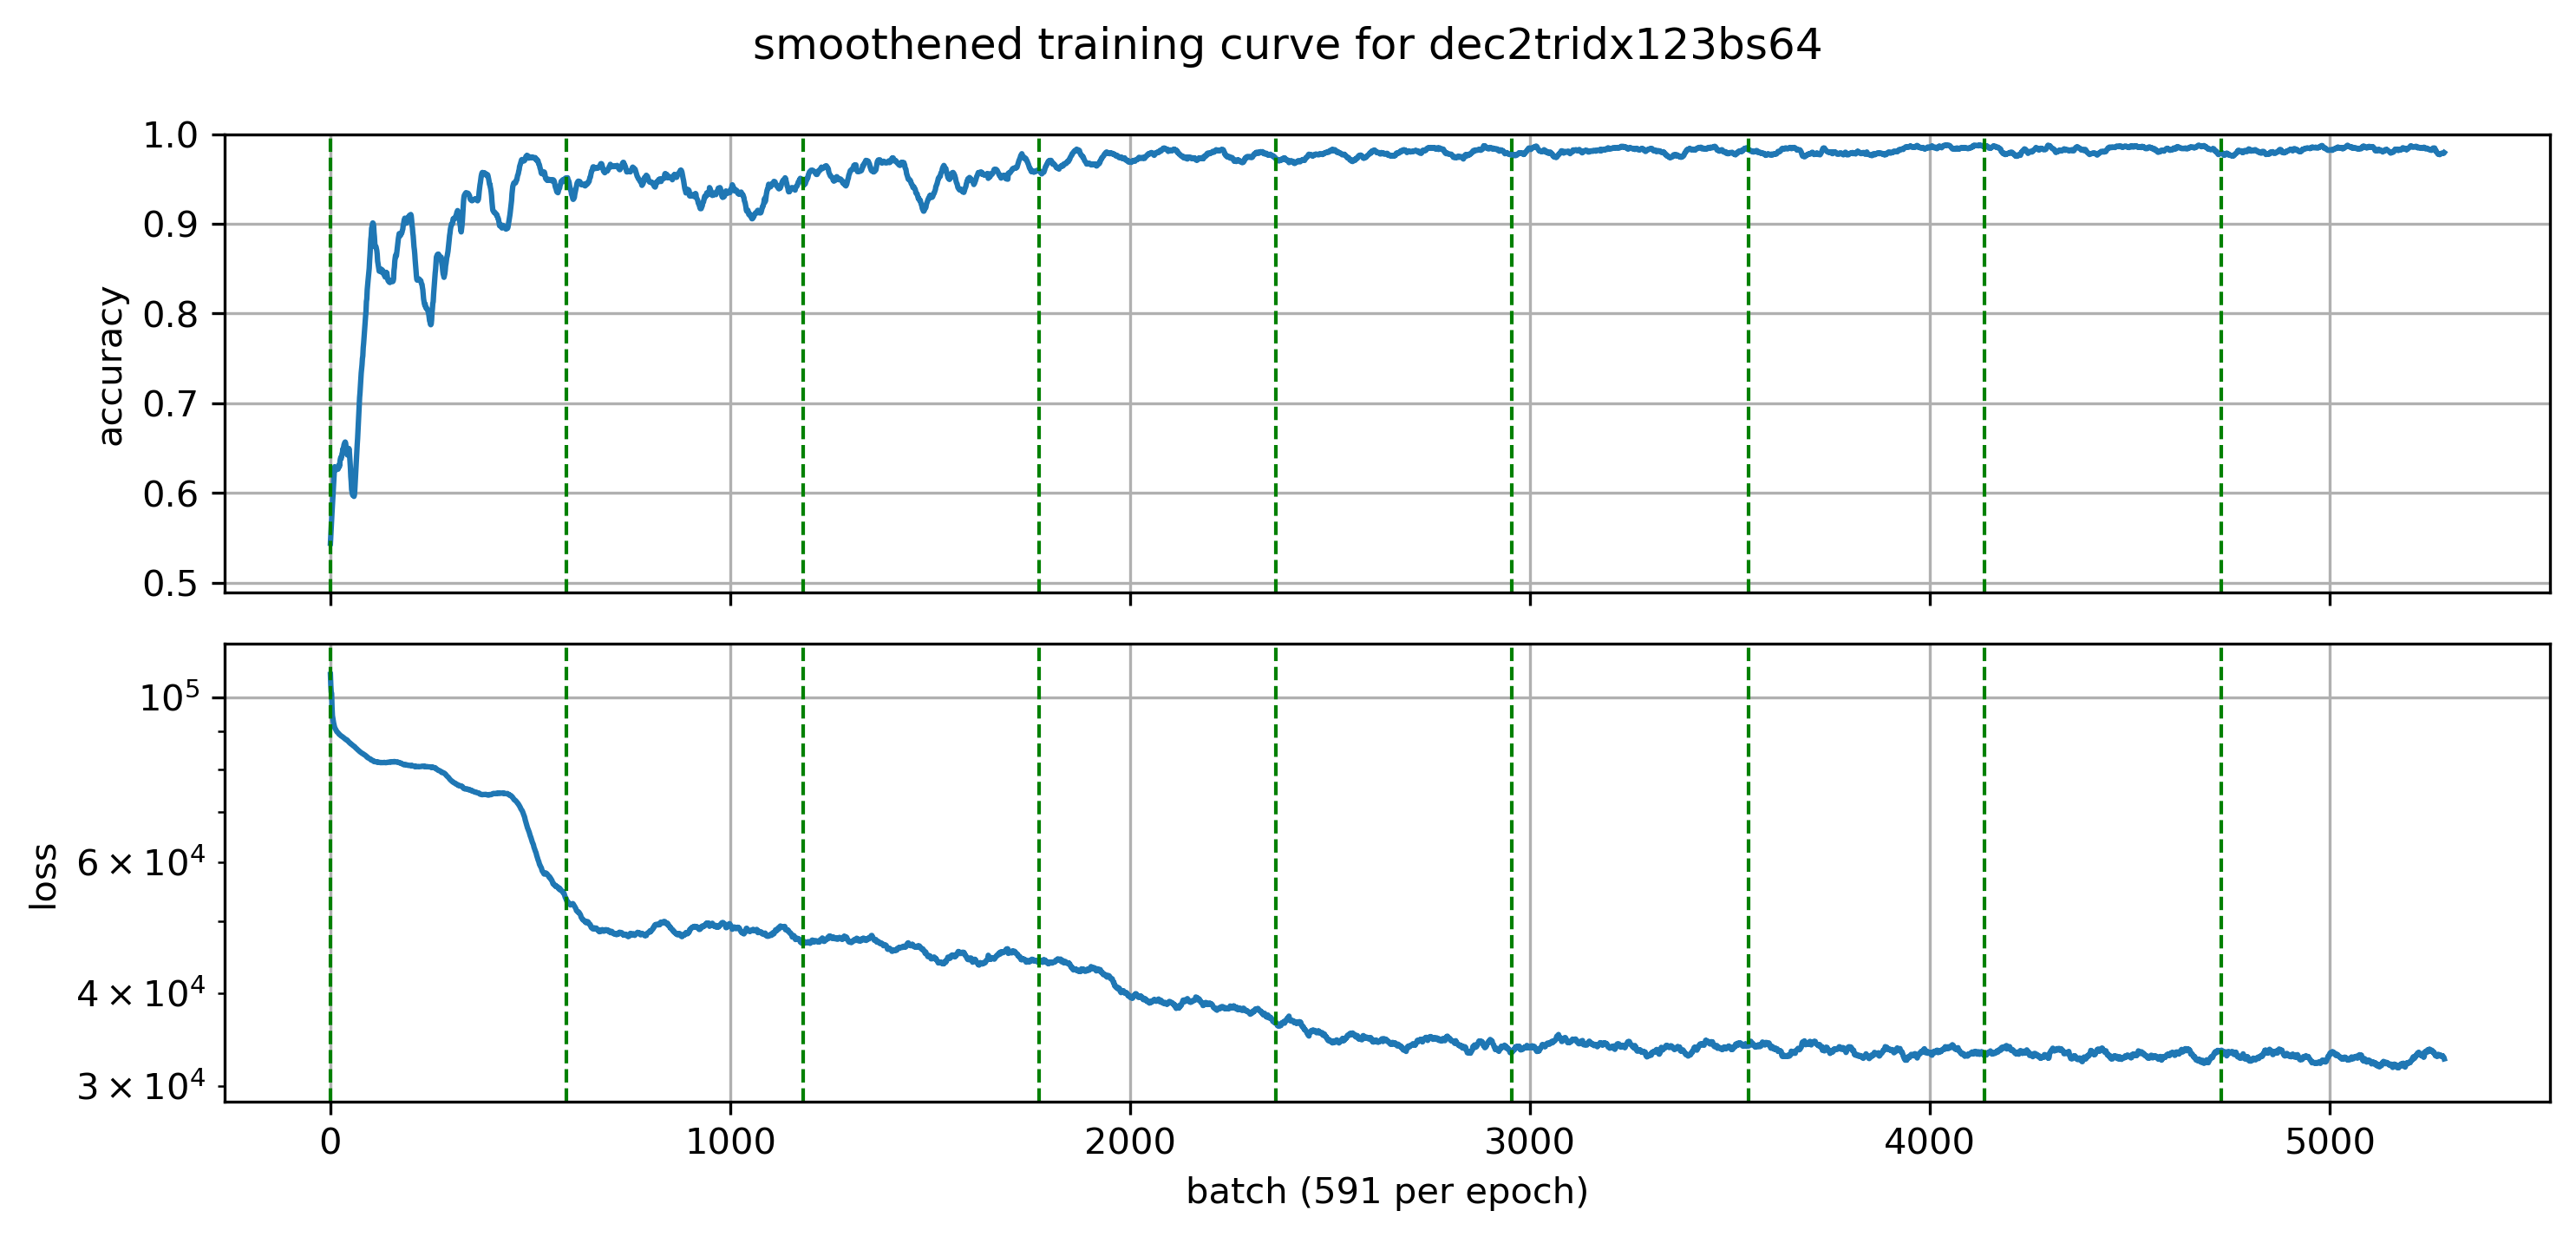

In [21]:
plot_acc_loss(acc, loss, title=f'smoothened training curve for {folder.split("/")[-1]}',
              n_batches=n_batches, conv=50)